In [2]:
file = '/home/dev/Documents/IOMT/'

In [3]:
normal = file+'ptbdb_normal.csv'
abnormal = file+'ptbdb_abnormal.csv'

In [4]:
print(normal)
print(abnormal)

/home/dev/Documents/IOMT/ptbdb_normal.csv
/home/dev/Documents/IOMT/ptbdb_abnormal.csv


In [5]:
import os
print(os.path.exists(normal))
print(os.path.exists(abnormal))

True
True


In [6]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

CUDA available: True
Device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [8]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.19.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
pip install pandas matplotlib scikit-learn seaborn tensorflow numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install "numpy<2";

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [10]:
normal_data = pd.read_csv(normal , header=None)
abnormal_data = pd.read_csv(abnormal , header=None)

In [11]:
normal_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.487680,0.114305,0.000000,0.030116,0.065024,0.060917,0.050992,0.053388,0.051677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.460381,0.122178,0.009296,0.125719,0.220009,0.267375,0.262948,0.260292,0.274015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.755102,0.135116,0.000000,0.285714,0.331457,0.256861,0.258269,0.253343,0.277270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.706176,0.323144,0.101684,0.013724,0.222707,0.285714,0.295696,0.325016,0.350593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


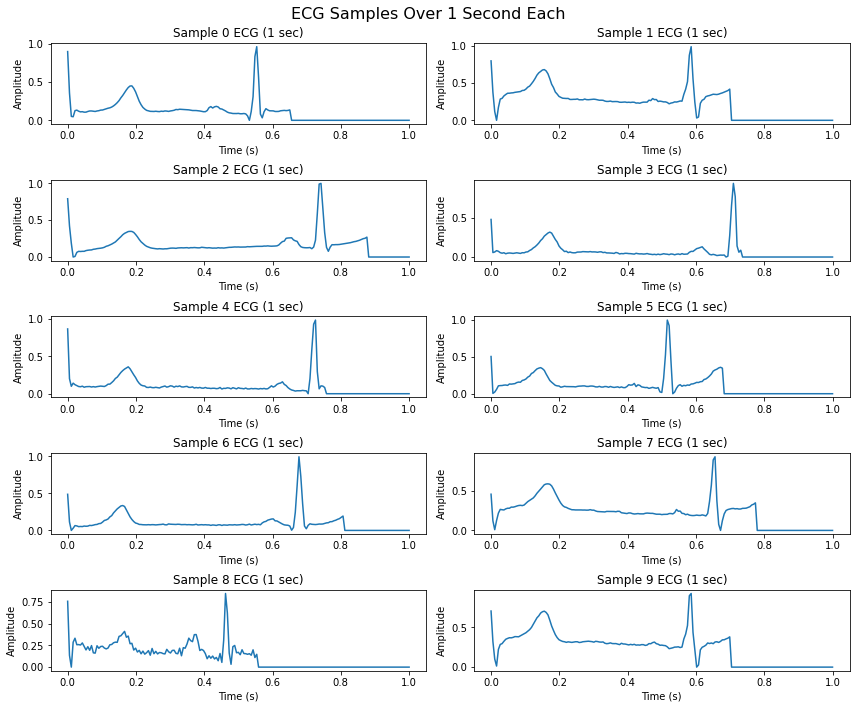

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Drop index column if needed
if isinstance(normal_data, pd.DataFrame):
    data = normal_data.drop(columns=normal_data.columns[0]).values
else:
    data = normal_data

# Only plot the first 10 samples
n_samples = min(10, data.shape[0])
timesteps = data.shape[1]
time = np.linspace(0, 1, timesteps)

# Plot
plt.figure(figsize=(12, 10))
for i in range(n_samples):
    plt.subplot(5, 2, i + 1)
    plt.plot(time, data[i])
    plt.title(f"Sample {i} ECG (1 sec)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.suptitle("ECG Samples Over 1 Second Each", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


In [124]:
abnormal_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.999144,0.774829,0.522260,0.250856,0.000000,0.066781,0.093322,0.144692,0.154110,0.152397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.000000,0.871452,0.678353,0.357262,0.051196,0.000000,0.090707,0.142460,0.138564,0.185309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.000000,0.729630,0.583333,0.350926,0.279630,0.321296,0.267593,0.229630,0.218519,0.203704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.932234,0.810440,0.627595,0.422161,0.263126,0.145910,0.109280,0.088523,0.079976,0.073565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


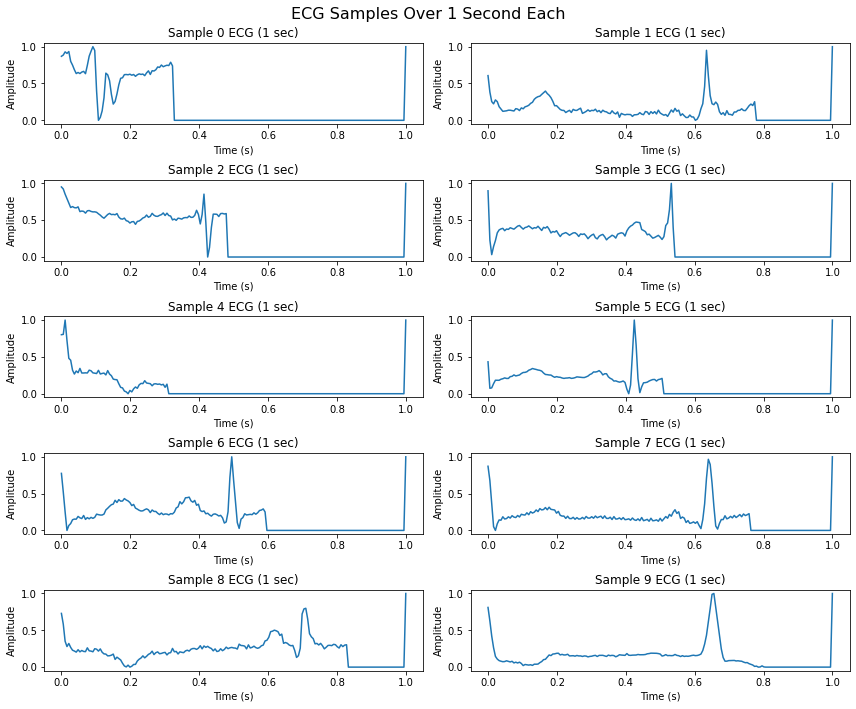

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Drop index column if needed
if isinstance(abnormal_data, pd.DataFrame):
    data = abnormal_data.drop(columns=abnormal_data.columns[0]).values
else:
    data = abnormal_data

# Only plot the first 10 samples
n_samples = min(10, data.shape[0])
timesteps = data.shape[1]
time = np.linspace(0, 1, timesteps)

# Plot
plt.figure(figsize=(12, 10))
for i in range(n_samples):
    plt.subplot(5, 2, i + 1)
    plt.plot(time, data[i])
    plt.title(f"Sample {i} ECG (1 sec)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.suptitle("ECG Samples Over 1 Second Each", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


In [20]:
normal_data.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

In [21]:
abnormal_data.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

In [14]:
X = np.concatenate((normal_data.iloc[:, :-1].values, abnormal_data.iloc[:, :-1].values))
y = np.concatenate((np.zeros(normal_data.shape[0]), np.ones(abnormal_data.shape[0])))

In [15]:
print("Number of rows (samples):", X.shape[0])


Number of rows (samples): 14552


In [25]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
print("Building and training the model...")
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


#model.save('ecg_1d_model.keras')
#print("\nModel saved as ecg_1d_model.keras")

Building and training the model...
Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7739 - loss: 0.4522 - val_accuracy: 0.7994 - val_loss: 0.3944
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8304 - loss: 0.3666 - val_accuracy: 0.8640 - val_loss: 0.3473
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.3244 - val_accuracy: 0.8691 - val_loss: 0.3187
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8817 - loss: 0.2935 - val_accuracy: 0.8619 - val_loss: 0.3072
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8961 - loss: 0.2652 - val_accuracy: 0.8980 - val_loss: 0.2714
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9012 - loss: 0.2542 - val_accuracy: 0.8921 - val_loss: 0.2663
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9042 - loss: 0.2409 - val_accuracy: 0.8963 - val_loss: 0.2548
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.907

In [19]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

Test Accuracy: 94.43%
Test Loss: 0.1594


In [39]:
#Random Forest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
randomForest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
randomForest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
print("\nEvaluating the Random Forest Classifier...")

# Make predictions on the test set
y_pred = randomForest_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluating the Random Forest Classifier...
Accuracy: 0.9705

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95       809
         1.0       0.97      0.99      0.98      2102

    accuracy                           0.97      2911
   macro avg       0.97      0.96      0.96      2911
weighted avg       0.97      0.97      0.97      2911



In [29]:
import joblib
model_filename = 'random_forest_model.joblib'
model_path = os.path.join("models", model_filename)
joblib.dump(randomForest_model, model_path)
print(f"\nModel successfully saved as {model_filename}")

# You can load the model later with:
# loaded_model = joblib.load(model_filename)


Model successfully saved as random_forest_model.joblib


In [43]:
#KNN

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Create the KNN model
# n_neighbors: number of neighbors to use
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
print("\nEvaluating the K-Nearest Neighbors Classifier...")

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluating the K-Nearest Neighbors Classifier...
Accuracy: 0.9299

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       809
         1.0       0.96      0.94      0.95      2102

    accuracy                           0.93      2911
   macro avg       0.91      0.92      0.91      2911
weighted avg       0.93      0.93      0.93      2911



In [32]:
model_filename = 'knn_model.joblib'
model_path = os.path.join("models", model_filename)
joblib.dump(knn_model, model_path)
print(f"\nModel successfully saved as {model_filename}")

# You can load the model later with:
# loaded_model = joblib.load(model_filename)


Model successfully saved as knn_model.joblib


In [51]:
#XgBoost

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [34]:
xgb_model = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)


/home/dev/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:02:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [35]:
print("\nEvaluating the XGBoost Classifier...")

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluating the XGBoost Classifier...
Accuracy: 0.9784

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       809
         1.0       0.98      0.99      0.99      2102

    accuracy                           0.98      2911
   macro avg       0.98      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911



In [36]:
model_filename = 'xgboost_model.joblib'
model_path = os.path.join("models", model_filename)
joblib.dump(xgb_model, model_path)
print(f"\nModel successfully saved as {model_filename}")

# You can load the model later with:
# loaded_model = joblib.load(model_filename)


Model successfully saved as xgboost_model.joblib


In [19]:
#Support Vector Machine

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM model
# kernel: specifies the kernel type to be used in the algorithm
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model on the scaled data
svm_model.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [28]:
print("\nEvaluating the Support Vector Machine Classifier...")

# Make predictions on the scaled test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluating the Support Vector Machine Classifier...
Accuracy: 0.9234

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.86       809
         1.0       0.93      0.97      0.95      2102

    accuracy                           0.92      2911
   macro avg       0.92      0.89      0.90      2911
weighted avg       0.92      0.92      0.92      2911



In [ ]:
model_filename = 'svm_model.joblib'
scaler_filename = 'svm_scaler.joblib'
joblib.dump(model, model_filename)
joblib.dump(scaler, scaler_filename)
print(f"\nModel successfully saved as {model_filename}")
print(f"Scaler successfully saved as {scaler_filename}")

# You can load the model and scaler later with:
# loaded_model = joblib.load(model_filename)
# loaded_scaler = joblib.load(scaler_filename)

In [29]:
#Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression model
lgr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the scaled data
lgr_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
print("\nEvaluating the Logistic Regression Classifier...")

# Make predictions on the scaled test set
y_pred = lgr_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluating the Logistic Regression Classifier...
Accuracy: 0.8279

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.56      0.65       809
         1.0       0.85      0.93      0.89      2102

    accuracy                           0.83      2911
   macro avg       0.80      0.75      0.77      2911
weighted avg       0.82      0.83      0.82      2911



In [29]:
#LSTM  Model

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ 1. Check if GPU is available
print("Available devices:", tf.config.list_physical_devices('GPU'))
if tf.config.list_physical_devices('GPU'):
    print("✅ GPU is available and will be used.")
else:
    print("❌ GPU not found. Check TensorFlow + CUDA installation.")

# ✅ 2. Optional: Set GPU memory growth to avoid memory pre-allocation
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# ✅ 3. Build LSTM model
print("Building and training the optimized LSTM model on GPU...")

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ 4. Callbacks for performance and monitoring
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_ecg_lstm_model.keras', save_best_only=True, monitor='val_loss', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# ✅ 5. Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,  # 🔥 Use larger batch size for GPU efficiency
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1
)

# ✅ 6. Save final model
model.save('ecg_lstm_model_final.keras')
print("\nFinal model saved as ecg_lstm_model_final.keras")


Available devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ GPU is available and will be used.
Physical devices cannot be modified after being initialized
Building and training the optimized LSTM model on GPU...
Epoch 1/50
180/182 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7143 - loss: 0.6038
Epoch 1: val_loss improved from None to 0.56731, saving model to best_ecg_lstm_model.keras
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7178 - loss: 0.5723 - val_accuracy: 0.7221 - val_loss: 0.5673 - learning_rate: 0.0010
Epoch 2/50
181/182 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7264 - loss: 0.5252
Epoch 2: val_loss improved from 0.56731 to 0.50220, saving model to best_ecg_lstm_model.keras
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7334 - loss: 0.5135 - val_accuracy: 0.7269 - val_loss: 0.5022 - learning_rate: 0.0010
Epoch 3/50
181/182 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7338 - loss: 0.5060
Epoch 3: val_loss did not improv

In [31]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

Test Accuracy: 73.07%
Test Loss: 0.4816


In [140]:
import zlib

In [146]:
X = np.concatenate((normal_data.iloc[:, :-1].values, abnormal_data.iloc[:, :-1].values))
y = np.concatenate((np.zeros(normal_data.shape[0]), np.ones(abnormal_data.shape[0])))

In [147]:
x_bytes = X.tobytes()
y_bytes = y.tobytes()

In [148]:
compressed_x = zlib.compress(x_bytes)
compressed_y = zlib.compress(y_bytes)


In [149]:
print(f"Original X size: {len(x_bytes) / 1024:.2f} KB")
print(f"Compressed X size: {len(compressed_x) / 1024:.2f} KB")

Original X size: 21259.56 KB
Compressed X size: 6777.38 KB


In [121]:
print(f"First 100 bytes of compressed_x: {compressed_x[:100]}")

First 100 bytes of compressed_x: b"x\x9c\xec\xbdw\\\x14\xcd\xb2?\xbc\xe6\x9cs\xdc\xc5\xac\x98\x1fs\xda\xd5\xc7\xc4c\xce\x18wM\x98\xb3b\x965\xe7\x9cPQF\x11\x04\x15\tJVv\xc89\x071 \x8b\x18\x00\x151gy\x99\xfa\xf6\x0e\xb3\xf7\x9c\xdf\xfb\xb9\xe7\xf7\xde\xf7\xde{\xcea\xfe\xa9O\xcf\xf4t\xa8\xae\xae\xae\xae\xae\xaa\x96\xc9\x84'_YPP`\xbb6"


In [117]:
compressed_x = compressed_x.reshape(compressed_x.shape[0], compressed_x.shape[1], 1)

AttributeError: 'bytes' object has no attribute 'reshape'

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [95]:
print("Building and training the model...")
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


model.save('ecg_1d_model_zlib.keras')
print("\nModel saved as ecg_1d_model.keras")

Building and training the model...
Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7809 - loss: 0.4490 - val_accuracy: 0.8059 - val_loss: 0.4081
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8415 - loss: 0.3479 - val_accuracy: 0.8478 - val_loss: 0.3327
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8680 - loss: 0.3108 - val_accuracy: 0.8736 - val_loss: 0.2999
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.2837 - val_accuracy: 0.8973 - val_loss: 0.2729
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.2660 - val_accuracy: 0.9045 - val_loss: 0.2582
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8996 - loss: 0.2563 - val_accuracy: 0.9110 - val_loss: 0.2467
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9071 - loss: 0.2414 - val_accuracy: 0.9186 - val_loss: 0.2291
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.916

In [96]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

Test Accuracy: 94.40%
Test Loss: 0.1623
